<a href="https://colab.research.google.com/github/matheus-haruki/Processamento-de-Linguagem-Natural/blob/main/Projeto_2_Estat%C3%ADstica_Descritiva_aplicada_em_um_Corpus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto #2 de PLN

Estatística Descritiva aplicada em um Corpus


Objetivo do notebook:

Este notebook tem como objetivo aplicar técnicas de estatística descritiva à análise linguística de um corpus textual, com foco na frequência e variação do uso de advérbios em diferentes gêneros, como romances e crônicas. Através da etiquetagem gramatical automatizada, busca-se explorar padrões de uso e aspectos estilísticos presentes nos textos.

Técnicas de PLN implementadas:

No desenvolvimento deste projeto, foram empregadas técnicas fundamentais de Processamento de Linguagem Natural (PLN), com ênfase na etiquetagem gramatical (POS tagging), que permite identificar a classe gramatical de cada palavra no corpus. A partir dessa etiquetagem, foram extraídos e analisados os advérbios, que serviram como base para a aplicação da estatística descritiva.

Além disso, foram utilizadas técnicas de limpeza e filtragem do corpus, removendo elementos irrelevantes para a análise, como pontuações, espaços e símbolos. Essa etapa foi essencial para garantir a precisão dos resultados. Por fim, os dados processados foram representados visualmente por meio de gráficos de barras e gráficos de setores (pizza), permitindo uma interpretação mais clara dos padrões encontrados.

In [1]:
import nltk
from nltk.corpus import machado

nltk.download('machado')

[nltk_data] Downloading package machado to /root/nltk_data...


True

# 1. Verificando o conteúdo do Corpus Machado e extraindo.

In [2]:
import zipfile

caminho_do_zip = '/root/nltk_data/corpora/machado.zip'

arquivo_zip = zipfile.ZipFile(caminho_do_zip, 'r')

arquivo_zip.printdir()

File Name                                             Modified             Size
machado/                                       2009-11-07 17:15:34            0
machado/CONTENTS                               2009-11-07 17:01:42         7414
machado/contos/                                2009-11-07 00:29:12            0
machado/contos/macn001.txt                     2009-11-07 00:27:08       325777
machado/contos/macn002.txt                     2009-11-07 00:27:08       263696
machado/contos/macn003.txt                     2009-11-07 00:27:10       319473
machado/contos/macn004.txt                     2009-11-07 00:27:10       294593
machado/contos/macn005.txt                     2009-11-07 00:27:10       253555
machado/contos/macn006.txt                     2009-11-07 00:27:10       130664
machado/contos/macn007.txt                     2009-11-07 00:27:12       169880
machado/contos/macn008.txt                     2009-11-07 00:27:12         3936
machado/contos/macn009.txt              

In [3]:
# extrair o conteúdo para analisar

import os

pasta_destino = '/root/nltk_data/corpora/'

os.makedirs(pasta_destino, exist_ok=True)

arquivo_zip.extractall(pasta_destino)

print(f"Arquivo {caminho_do_zip} extraído com sucesso para a pasta {pasta_destino}.")

Arquivo /root/nltk_data/corpora/machado.zip extraído com sucesso para a pasta /root/nltk_data/corpora/.


#2. Etiquetação Morfológica (POS Tagging)



In [4]:
!pip install
!python -m spacy download pt_core_news_sm

ERROR: You must give at least one requirement to install (see "pip help install")
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 93.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
# exemplo de etiquetagem morfologica
import spacy

nlp = spacy.load("pt_core_news_sm")

doc = nlp("Vamos estudar Processamento de linguagem natural.")

etiq = [(x.orth_, x.pos_) for x in doc]

print(etiq)


[('Vamos', 'AUX'), ('estudar', 'VERB'), ('Processamento', 'PROPN'), ('de', 'ADP'), ('linguagem', 'NOUN'), ('natural', 'ADJ'), ('.', 'PUNCT')]


In [9]:
# Função para leitura dos arquivos a serem utilizados
def ler(nome_arquivo):
    arquivo = open(nome_arquivo, 'r', encoding='ISO-8859-1')
    conteudo_arq = arquivo.read()
    arquivo.close()
    return conteudo_arq


In [11]:
# obtenção dos caminhos dos arquivos para serem analisados
obras = []

for i in range(1,6):
    obras.append('/root/nltk_data/corpora/machado/romance/marm0' + str(i) + '.txt')

for i in range(1,6):
    obras.append('/root/nltk_data/corpora/machado/cronica/macr0' + str(i) + '.txt')

obras


['/root/nltk_data/corpora/machado/romance/marm01.txt',
 '/root/nltk_data/corpora/machado/romance/marm02.txt',
 '/root/nltk_data/corpora/machado/romance/marm03.txt',
 '/root/nltk_data/corpora/machado/romance/marm04.txt',
 '/root/nltk_data/corpora/machado/romance/marm05.txt',
 '/root/nltk_data/corpora/machado/cronica/macr01.txt',
 '/root/nltk_data/corpora/machado/cronica/macr02.txt',
 '/root/nltk_data/corpora/machado/cronica/macr03.txt',
 '/root/nltk_data/corpora/machado/cronica/macr04.txt',
 '/root/nltk_data/corpora/machado/cronica/macr05.txt']

In [12]:
import statistics as stat

cont_adv = []

for obra in obras:
    print(obra)
    s = ler(obra)

    doc = nlp(s)
    etiq = [(x.orth_, x.pos_) for x in doc]
    adv = [(ort, pos) for (ort, pos) in etiq if pos == "ADV"]
    cont_adv.append(len(adv) / len(etiq))


/root/nltk_data/corpora/machado/romance/marm01.txt
/root/nltk_data/corpora/machado/romance/marm02.txt
/root/nltk_data/corpora/machado/romance/marm03.txt
/root/nltk_data/corpora/machado/romance/marm04.txt
/root/nltk_data/corpora/machado/romance/marm05.txt
/root/nltk_data/corpora/machado/cronica/macr01.txt
/root/nltk_data/corpora/machado/cronica/macr02.txt
/root/nltk_data/corpora/machado/cronica/macr03.txt
/root/nltk_data/corpora/machado/cronica/macr04.txt
/root/nltk_data/corpora/machado/cronica/macr05.txt


In [13]:
cont_adv

[0.06059252642548757,
 0.06217443568852678,
 0.05392558824755737,
 0.060081142081723646,
 0.05774050146712507,
 0.04643839583031707,
 0.04072243346007605,
 0.0439109341957955,
 0.046125480153649166,
 0.04610318331503842]

In [14]:
rom_m = stat.mean(cont_adv[:4])
rom_dp = stat.stdev(cont_adv[:4])
cron_m = stat.mean(cont_adv[5:])
cron_dp = stat.stdev(cont_adv[5:])


#3. Geração de gráficos para demonstração de resultados

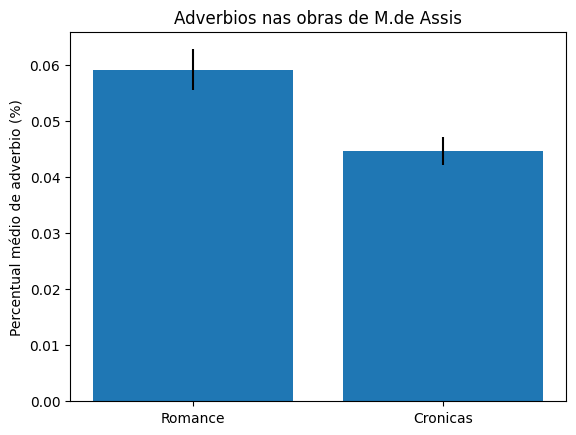

In [15]:
import matplotlib.pyplot as plt

tipo_obra = ["Romance", "Cronicas"]

x = [0,1]
y = [rom_m, cron_m]
dp = [rom_dp, cron_dp]

plt.bar(x, y, yerr = dp)
plt.xticks(x, tipo_obra)
plt.ylabel('Percentual médio de adverbio (%)')
plt.title('Adverbios nas obras de M.de Assis')

plt.show()


#4. Análise de classes gramaticais


In [18]:
# limpeza para classificação
lixo = ['PUNCT', 'SPACE', 'X', 'SYM', 'NUM']
pos2 = [pos for (pal, pos) in etiq if pos not in lixo]

In [19]:
from collections import defaultdict

cont = defaultdict(int)
for p in pos2:
    cont[p] += 1

nomes = cont.keys()
ocorrencias = cont.values()

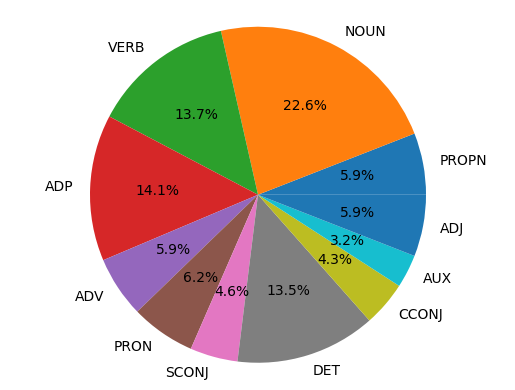

In [20]:
plt.pie(ocorrencias, labels=nomes, autopct="%1.1f%%")
plt.axis('equal')
plt.show()